In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from os.path import exists
import sklearn.linear_model as lm

import sys
sys.path.insert(0, "../util/")
import util as util

/Users/garysimmons/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [2]:
amesHousing = pd.read_csv('../data/Ames_Housing_Price_Data.csv')
amesRealEstate = pd.read_csv('../data/Ames_Real_Estate_Data.csv')

/Users/garysimmons/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
amesHousing.head()

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [4]:
set(amesHousing["ExterQual"])

{'Ex', 'Fa', 'Gd', 'TA'}

In [5]:
set(amesHousing["Functional"])

{'Maj1', 'Maj2', 'Min1', 'Min2', 'Mod', 'Sal', 'Typ'}

In [43]:
set(amesHousing["MSZoning"])

{'A (agr)', 'C (all)', 'FV', 'I (all)', 'RH', 'RL', 'RM'}

In [6]:
amesRealEstate.head()

,MapRefNo,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,...,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
0,520400001,520400001,0,0,4599 GEORGE W CARVER AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,4599.0,NaN,GEORGE W CARVER,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
1,520440010,520440010,0,0,4507 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,4507.0,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
2,520440020,520440020,0,0,4513 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,4513.0,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
3,520445001,520445001,0,0,3449 BARCELOS ST,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,3449.0,NaN,BARCELOS,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
4,520445010,520445010,0,0,4506 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,4506.0,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN


In [7]:
amesHousing['MSSubClass'] = amesHousing['MSSubClass'].apply(str)

In [8]:
amesHousing['MSSubClass'].dtype

dtype('O')

In [9]:
amesHousingCategoricalData = amesHousing.select_dtypes(include=['O'])

In [10]:
amesHousingCategoricalData["Alley"].value_counts()

Grvl    105
Pave     63
Name: Alley, dtype: int64

In [11]:
for col in amesHousingCategoricalData.columns:
    print(col)
    print(set(amesHousing[col]))
    if (amesHousing[col].isnull().values.any()):
        print(amesHousing[col].value_counts())
        print(f'{amesHousing[col].isnull().sum()} nan values')

MSSubClass
{'20', '50', '75', '180', '45', '40', '60', '70', '160', '90', '30', '150', '190', '80', '85', '120'}
MSZoning
{'A (agr)', 'RL', 'C (all)', 'RM', 'RH', 'I (all)', 'FV'}
Street
{'Grvl', 'Pave'}
Alley
{nan, 'Grvl', 'Pave'}
Grvl    105
Pave     63
Name: Alley, dtype: int64
2412 nan values
LotShape
{'IR1', 'Reg', 'IR2', 'IR3'}
LandContour
{'HLS', 'Bnk', 'Low', 'Lvl'}
Utilities
{'AllPub', 'NoSewr'}
LotConfig
{'FR3', 'Inside', 'Corner', 'FR2', 'CulDSac'}
LandSlope
{'Mod', 'Sev', 'Gtl'}
Neighborhood
{'MeadowV', 'SWISU', 'BrkSide', 'NridgHt', 'Blmngtn', 'NoRidge', 'Sawyer', 'Edwards', 'IDOTRR', 'CollgCr', 'Blueste', 'Greens', 'NPkVill', 'BrDale', 'Somerst', 'NAmes', 'Timber', 'Crawfor', 'Landmrk', 'Veenker', 'GrnHill', 'StoneBr', 'NWAmes', 'OldTown', 'Mitchel', 'SawyerW', 'Gilbert', 'ClearCr'}
Condition1
{'Feedr', 'PosA', 'RRAe', 'RRNe', 'Artery', 'Norm', 'RRNn', 'RRAn', 'PosN'}
Condition2
{'Feedr', 'PosA', 'RRAe', 'Artery', 'Norm', 'RRNn', 'RRAn', 'PosN'}
BldgType
{'Duplex', '2fmCo

In [12]:
for col in amesHousingCategoricalData.columns:
    if (amesHousing[col].isnull().values.any()):
        print(amesHousing[amesHousing[col]=='nan'].shape[0])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [13]:
for col in amesHousingCategoricalData.columns:
    amesHousing[col]=amesHousing[col].fillna('nan')

In [14]:
for col in amesHousingCategoricalData.columns:
    if (amesHousing[col].isnull().values.any()):
        print(amesHousing[amesHousing[col]=='nan'].shape[0])

In [15]:
pd.get_dummies(amesHousing['Utilities'],prefix='Utilites',drop_first=True)

,Utilites_NoSewr
0,0
1,0
2,0
3,0
4,0
...,...
2575,0
2576,0
2577,0
2578,0


In [16]:
a = {1:1,2:2,3:3}

In [17]:
5 in a.keys()

False

In [18]:
relatedDummiesDictionary = {}
for col in amesHousingCategoricalData.columns:
    dummyData = pd.get_dummies(amesHousing[col],prefix=col,drop_first=True)
    for dummyCol in dummyData.columns:
        relatedDummiesDictionary[str(dummyCol)] = list(dummyData.columns)
    amesHousing = pd.concat([amesHousing,dummyData],axis=1)

In [19]:
set(amesHousing.dtypes)

{dtype('uint8'), dtype('int64'), dtype('float64'), dtype('O')}

In [20]:
amesHousingNumericalData = amesHousing.select_dtypes(include=['uint8','int64','float64'])
[col for col in amesHousingNumericalData.columns if amesHousingNumericalData[col].isnull().values.any()]

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [21]:
corr = amesHousingNumericalData.corr()
corr

,Unnamed: 0,PID,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Unnamed: 0,1.000000,-0.008030,-0.013745,-0.028413,0.012410,-0.019958,-0.017036,-0.005499,0.004610,-0.009982,...,-0.006111,0.028411,-0.008410,0.015410,-0.038088,-0.014528,-0.003195,0.021398,-0.047867,0.026312
PID,-0.008030,1.000000,-0.102270,-0.226276,-0.095379,0.042049,-0.247168,0.120013,-0.337963,-0.128744,...,0.042267,-0.125620,0.021351,0.019876,0.062583,0.028619,0.020295,-0.022299,0.067700,-0.121131
GrLivArea,-0.013745,-0.102270,1.000000,0.719981,0.345448,0.260322,0.559897,-0.105670,0.228400,0.306035,...,-0.033038,0.115503,-0.028011,-0.012496,-0.032713,0.018013,0.009111,0.012986,-0.066584,0.110810
SalePrice,-0.028413,-0.226276,0.719981,1.000000,0.358577,0.274443,0.790501,-0.101091,0.544370,0.514309,...,-0.041724,0.259688,-0.039127,-0.010778,-0.101079,-0.014595,-0.011185,-0.033765,-0.126290,0.258698
LotFrontage,0.012410,-0.095379,0.345448,0.358577,1.000000,0.463720,0.179656,-0.054048,0.099602,0.063548,...,-0.042859,0.061793,0.008067,0.015692,-0.033605,-0.026281,0.028549,-0.014094,-0.046534,0.058574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,-0.014528,0.028619,0.018013,-0.014595,-0.026281,-0.002589,-0.011125,-0.002945,-0.019979,-0.028894,...,-0.001553,-0.004950,-0.001098,-0.000548,0.007809,1.000000,-0.001098,-0.002268,-0.106216,-0.005046
SaleCondition_Alloca,-0.003195,0.020295,0.009111,-0.011185,0.028549,0.005525,-0.022944,-0.004166,-0.009368,-0.002408,...,-0.002198,-0.007003,-0.001553,-0.000776,0.011047,-0.001098,1.000000,-0.003209,-0.150270,-0.007139
SaleCondition_Family,0.021398,-0.022299,0.012986,-0.033765,-0.014094,0.019139,0.000756,-0.040640,-0.012469,-0.042744,...,0.081625,-0.014475,-0.003209,-0.001604,-0.014031,-0.002268,-0.003209,1.000000,-0.310574,-0.014756
SaleCondition_Normal,-0.047867,0.067700,-0.066584,-0.126290,-0.046534,-0.027679,-0.105532,0.105176,-0.114190,-0.091467,...,-0.013788,-0.677753,-0.110119,0.005164,0.534251,-0.106216,-0.150270,-0.310574,1.000000,-0.690916


<AxesSubplot:>

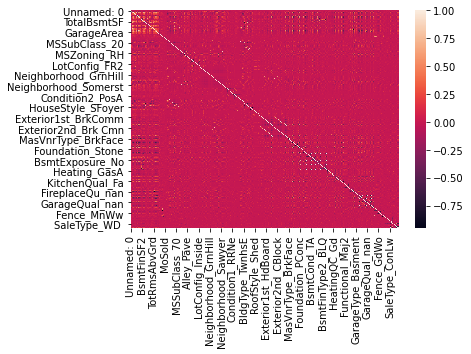

In [22]:
sns.heatmap(corr)

In [23]:
correlationList = []
pairList = []
pValList = []
for i in range(len(amesHousingNumericalData.columns)):
    for j in range(len(amesHousingNumericalData.columns)):
        if i<j:
            iColumn = amesHousingNumericalData.columns[i]
            jColumn = amesHousingNumericalData.columns[j]
            pairList.append(iColumn+'-'+jColumn)
            corrVal,pVal = stats.spearmanr(amesHousingNumericalData[iColumn],
                                          amesHousingNumericalData[jColumn])
            correlationList.append(corrVal)
            pValList.append(pVal)

amesHousingCorreltaion = pd.DataFrame({"pair":pairList,
                                "corr":correlationList,
                                "pVal":pValList
                               },columns=["pair","corr","pVal"]).sort_values(by=["pVal","corr"],
                                                                             ascending=[True,False])
            
            

In [24]:
amesHousingSigCorrs = amesHousingCorreltaion[(np.isnan(amesHousingCorreltaion['pVal'])==False) & (amesHousingCorreltaion['pVal'] < 0.05)]

In [25]:
absRValues = abs(amesHousingSigCorrs['corr'])

In [26]:
type(amesHousingSigCorrs)

pandas.core.frame.DataFrame

In [27]:
print(amesHousingSigCorrs.size)
amesHousingSigCorrs = amesHousingSigCorrs[abs(amesHousingSigCorrs['corr']) > absRValues.quantile()]
print(amesHousingSigCorrs.size)

34356
17178


array([[<AxesSubplot:title={'center':'corr'}>,
        <AxesSubplot:title={'center':'pVal'}>]], dtype=object)

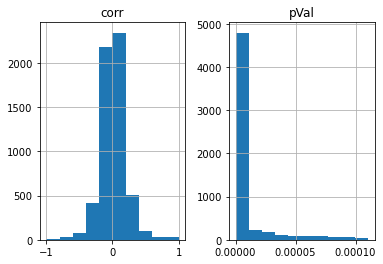

In [28]:
amesHousingSigCorrs.hist(bins=10)

In [29]:
amesHousingSigCorrs.head()

,pair,corr,pVal
13559,MSSubClass_90-BldgType_Duplex,1.0,0.0
31315,Exterior1st_PreCast-Exterior2nd_PreCast,1.0,0.0
36006,BsmtQual_nan-BsmtCond_nan,1.0,0.0
36016,BsmtQual_nan-BsmtFinType1_nan,1.0,0.0
36486,BsmtCond_nan-BsmtFinType1_nan,1.0,0.0


In [30]:
amesHousingSigCorrs['pair'].str.contains('YearBuilt')

13559    False
31315    False
36006    False
36016    False
36486    False
         ...  
12109    False
16338    False
37927    False
19381    False
12475    False
Name: pair, Length: 5726, dtype: bool

In [31]:
[1,2,3]+[]

[1, 2, 3]

In [32]:
relatedDummiesDictionary["MasVnrType_BrkFace"]

['MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'MasVnrType_nan']

In [33]:
sigCorrDictionary = {}
for col in amesHousingNumericalData.columns:
    correlatedRelations = (amesHousingSigCorrs[amesHousingSigCorrs['pair'].str.contains(col)])["pair"]
    correlatedColumns = [name.replace("-","").replace(col,"") for name in correlatedRelations]
    relatedDummies = []
    for corrCol in correlatedColumns:
        if corrCol in relatedDummiesDictionary.keys():
            print(corrCol)
            relatedDummies = relatedDummies + relatedDummiesDictionary[corrCol]
    correlatedColumns = list(set(correlatedColumns + relatedDummies))
    sigCorrDictionary[col] = correlatedColumns

Neighborhood_Gilbert
Neighborhood_Mitchel
Neighborhood_CollgCr
Neighborhood_NridgHt
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_NWAmes
Neighborhood_Timber
MSSubClass_60
MasVnrType_None
Neighborhood_StoneBr
ExterQual_TA
GarageFinish_Unf
Neighborhood_Somerst
Neighborhood_MeadowV
MSZoning_RM
Foundation_PConc
Neighborhood_NAmes
FireplaceQu_nan
Neighborhood_IDOTRR
MSSubClass_50
ExterQual_Gd
GarageCond_TA
GarageType_Attchd
MasVnrType_BrkFace
MSZoning_FV
LandContour_Lvl
GarageQual_TA
PavedDrive_Y
LandSlope_Mod
Neighborhood_NoRidge
GarageType_Detchd
KitchenQual_TA
SaleType_New
Neighborhood_BrDale
SaleCondition_Partial
BsmtQual_TA
Neighborhood_SWISU
HouseStyle_2Story
MSSubClass_70
LotShape_Reg
Exterior1st_Wd Sdng
GarageFinish_nan
GarageQual_nan
GarageCond_nan
CentralAir_Y
GarageType_nan
ExterCond_TA
GarageFinish_RFn
Neighborhood_NPkVill
BsmtQual_Gd
FireplaceQu_TA
Exterior2nd_Wd Sdng
Fence_MnPrv
Electrical_SBrkr
Fence_nan
HouseStyle_SFoyer
MSSubClass_180
MSSubClass_30
GarageType_Built

/Users/garysimmons/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)



Neighborhood_OldTown
MSZoning_RL
MSZoning_FV
GarageType_Detchd
MSZoning_RM
PavedDrive_Y
GarageType_Attchd
Neighborhood_Somerst
MSSubClass_70
BsmtFinType1_Unf
MSSubClass_20
Exterior2nd_MetalSd
Exterior1st_MetalSd
GarageFinish_Unf
Electrical_FuseP
MasVnrType_None
BsmtExposure_No
GarageQual_TA
GarageCond_TA
HouseStyle_1Story
MSSubClass_50
CentralAir_Y
GarageCond_Fa
MasVnrType_BrkFace
Foundation_CBlock
FireplaceQu_nan
GarageQual_Fa
BldgType_2fmCon
Electrical_SBrkr
MSSubClass_160
Foundation_Stone
LotShape_Reg
Neighborhood_NAmes
MSSubClass_60
Heating_OthW
MSSubClass_30
Exterior1st_HdBoard
Exterior1st_Wd Sdng
Exterior2nd_Stucco
Exterior1st_VinylSd
BsmtCond_Fa
GarageFinish_RFn
Exterior2nd_VinylSd
MSSubClass_190
Exterior2nd_Wd Sdng
LotConfig_Inside
BsmtQual_TA
FireplaceQu_TA
Exterior2nd_HdBoard
BsmtFinType1_GLQ
Exterior2nd_Plywood
Neighborhood_CollgCr
BsmtQual_Fa
RoofStyle_Hip
BsmtExposure_Gd
BsmtQual_Gd
LotShape_Reg
LotConfig_CulDSac
LotConfig_Inside
Foundation_PConc
BsmtQual_Gd
Neighborhood_

In [34]:
sigCorrDictionary

{'Unnamed: 0': [],
 'PID': ['YearBuilt',
  'MSSubClass_20',
  'Exterior1st_Wd Sdng',
  'FullBath',
  'BsmtFinType1_LwQ',
  'Foundation_PConc',
  'Exterior2nd_MetalSd',
  'GarageType_CarPort',
  'BsmtQual_TA',
  'HouseStyle_SLvl',
  'LotShape_IR3',
  'FireplaceQu_TA',
  'Neighborhood_Landmrk',
  'Electrical_SBrkr',
  'Functional_Mod',
  'Neighborhood_Edwards',
  'MSSubClass_40',
  'Neighborhood_NAmes',
  'MSSubClass_30',
  'GarageFinish_RFn',
  'MSSubClass_80',
  'MasVnrType_BrkFace',
  'MSZoning_RM',
  'Fireplaces',
  'GarageQual_Po',
  'Neighborhood_ClearCr',
  'Neighborhood_Veenker',
  'Functional_Min1',
  'KitchenQual_TA',
  'ExterCond_Po',
  'Exterior2nd_CmentBd',
  'Neighborhood_SWISU',
  'Exterior2nd_Plywood',
  'MSZoning_RL',
  'ExterQual_Fa',
  'Exterior2nd_Wd Sdng',
  'GarageType_Detchd',
  'FireplaceQu_Gd',
  'SaleType_VWD',
  'OverallCond',
  'SaleCondition_Normal',
  'ExterCond_TA',
  'GarageQual_TA',
  'Exterior1st_WdShing',
  'PavedDrive_P',
  'MSSubClass_85',
  'Conditio

In [35]:
powers = np.linspace(1,10,10)
X = (np.random.random(1000)*1000).reshape(-1, 1)
for power in powers:
    y = X ** power
    linmodel = lm.LinearRegression()
    linmodel.fit(np.log(X),np.log(y))
    print(f'power = {power} and slope is {linmodel.coef_[0,0]}')
    
    

power = 1.0 and slope is 1.0000000000000007
power = 2.0 and slope is 2.0000000000000013
power = 3.0 and slope is 3.0000000000000013
power = 4.0 and slope is 4.000000000000003
power = 5.0 and slope is 5.000000000000008
power = 6.0 and slope is 6.000000000000003
power = 7.0 and slope is 7.0000000000000036
power = 8.0 and slope is 8.000000000000005
power = 9.0 and slope is 8.999999999999998
power = 10.0 and slope is 10.000000000000016


In [36]:
housingTrainWithDummies = pd.read_csv('../data/housingTrainWithDummies.csv')
set(housingTrainWithDummies.dtypes)

/Users/garysimmons/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8,73) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


{dtype('int64'), dtype('float64'), dtype('O')}

In [37]:
values = list(np.random.random(1000)*1000)

In [38]:
df = pd.DataFrame({"values":values},columns = ["values"])
pd.qcut(df['values'],q=10,labels=np.linspace(0,9,10),retbins=True)

/Users/garysimmons/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/Users/garysimmons/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


(0      0.0
 1      5.0
 2      4.0
 3      6.0
 4      7.0
       ... 
 995    3.0
 996    3.0
 997    1.0
 998    7.0
 999    5.0
 Name: values, Length: 1000, dtype: category
 Categories (10, float64): [0.0 < 1.0 < 2.0 < 3.0 ... 6.0 < 7.0 < 8.0 < 9.0],
 array([6.22224227e-01, 9.77027880e+01, 1.92725450e+02, 2.98420005e+02,
        3.99209342e+02, 5.11125218e+02, 6.23917858e+02, 7.14720580e+02,
        8.07671861e+02, 9.07653301e+02, 9.97716357e+02]))

In [39]:
df.head()

,values
0,21.638770
1,536.074730
2,489.503259
3,704.198151
4,788.931086


In [40]:
try:
    somethingThatDoesntExist
except NameError:
    bonkers = "me"
    x = bonkers
print(x)

me


In [41]:
arr = np.array([0,-np.inf,5]).reshape(-1,1)
np.isinf(arr).any()

True

In [42]:
list(1)

TypeError: 'int' object is not iterable